![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b):
    return np.allclose(a, b, rtol=1e-12, atol=1e-12)

# Parte 1: Calculando raízes com a segunda derivada

Vimos, em aula, que o Método de Newton usa a primeira derivada da função $f$
para calcular uma aproximação linear da função, e sucessivamente se aproximar do mínimo.

Nesta parte, iremos usar a segunda derivada também.

## Questão 1: Fórmulas

Sejam dados
$$\begin{align*}
  f(x_0) & = v_0 \\
 f'(x_0) & = v_1 \\
f''(x_0) & = v_2
\end{align*}$$

Dê, em função de $x_0$, $v_0$, $v_1$ e $v_2$, as raizes da parábola correspondente.
Em particular, mostre que as raízes (se existirem) são da forma $x_0 + \text{passo}$.

Vamos assumir que estamos aplicando o Método de Newton em uma vizinhança de $x_0$, em uma distância (passo) dada por $h = x - x_0$.

Sabemos, pela Fórmula de Taylor, que se F é de classe $C^2$, vale:

$f(x+h) = f(x) + hf'(x) + \frac{1}{2}h^2f''(x)$,

Portanto, em $x_0$, temos:

$f(x_0+h) = f(x_0) + hf'(x_0) + \frac{1}{2}h^2f''(x_0)$,

Que, com as devidas substituições é:

$f(x_0+h) = 0 = v_0 + hv_1 + \frac{1}{2}h^2v_2$, e $h = x - x_0$

Que se reduz a uma equação de segundo grau:

$\frac{v_2}{2}h^2 + v_1h + v_0 = 0$

Cujo discriminante é:

$\Delta = v_1^2 - 2v_0v_2$

E o valor de $h$ é dado por:

$h = \frac{-v_1 \pm \sqrt{v_1^2 - 2v_0v_2}}{v_2}$

Como $h = x - x_0$, temos que o $x$ que zera a parábola é dada por:

$x = x_0 + h = x_0 + \frac{-v_1 \pm \sqrt{v_1^2 - 2v_0v_2}}{v_2}$

E o passo é dado por h, dado acima.

Qual raiz você escolheria?  Porquê?

Por conservadorismo, escolheria o menor passo, em valores absolutos, porque estamos assumindo que a função é duas vezes derivável (portanto bem comportada) e o zero será aproximado com um erro menor quanto menor for o passo, ou seja, o erro de aproximação diminui com o passo menor, permitindo uma melhor aproximação. Além disso, estamos assumindo que estamos fazendo uma busca pelo zero em uma vizinhança de $x_0$, portanto não há porque buscar o passo que mais se distancie de $x_0$, provocando uma possível saída da vizinhança.


## Questão 2: O passo

Escreva a função `step(v0, v1, v2)` que dá o passo a ser feito.

Se a parábola não possuir raiz, use, simplesmente, a regra original do método de Newton.

In [3]:
def step2(v0, v1, v2):
    delta = np.power(v1, 2) - 2 * v0 * v2
    if delta < 0:
        # Método de newton:
        return - v0/v1
    p1 = - (v1 + np.sqrt(np.power(v1,2) - 2 * v0 * v2))/v2
    p2 = - (v1 - np.sqrt(np.power(v1,2) - 2 * v0 * v2))/v2
    if np.abs(p1) > np.abs(p2):
        return p2
    return p1

In [4]:
assert step2(1, 2, 2) == -1

In [5]:
assert step2(1, 1, 1) == -1

In [6]:
assert np.isclose(step2(-1, 1, 0.2), 0.9160797831)

In [7]:
# Um teste mais difícil, não se preocupe muito se não passar
assert np.isclose(step2(-1,  1, -0.2), 1.1270166538)
assert np.isclose(step2( 1, -1,  0.2), 1.1270166538)

Explique porque os passos dos dois `assert`s da última caixa devem ser iguais.

Por que as parábolas $ax^2 + bx + c = 0$ definidas por $a = v_2/2$, $b = v_1$ e $c = v_0$, acima, têm os mesmos zeros.

## Questão 3: Newton

Dê, abaixo, o método de Newton, e também o método de "Newton com segunda derivada",
retornando a lista de todos os pontos visitados a partir de `x0`, inclusive.

O critério de parada será, para os dois, quando o tamanho do passo, _relativo ao ponto atual_,
for menor do que a precisão indicada por `reltol`.
(mas agora que você já calculou o passo, use-o, não custa quase nada!)

In [8]:
def newton(f, df, x0, maxsteps=100, reltol=1e-12):
    res = [x0]
    while len(res) <= maxsteps:
        x = res[-1] - f(res[-1])/df(res[-1])
        res.append(x)
        if len(res) > 1 and np.abs((res[-1] - res[-2])/res[-1]) < reltol:
            return res
    return res

def newton2(f, df, ddf, x0, maxsteps=100, reltol=1e-12):
    res = [x0]
    while len(res) <= maxsteps:
        x = res[-1] + step2(f(res[-1]), df(res[-1]), ddf(res[-1]))
        res.append(x)
        if len(res) > 1 and np.abs((res[-1] - res[-2])/res[-1]) < reltol:
            return res
    return res

In [9]:
xs_newton = newton(lambda x: np.exp(x) - 10, np.exp, 1)

assert len(xs_newton) == 9
assert veryclose(np.exp(xs_newton[-1]), 10)

In [10]:
xs_newton2 = newton2(lambda x: np.exp(x) - 10, np.exp, np.exp, 1, maxsteps=10)

assert len(xs_newton2) == 6
assert veryclose(np.exp(xs_newton2[-1]), 10)

Faça, agora, o gráfico do erro para cada um dos métodos ao calcular uma raiz de $e^x = 10$:

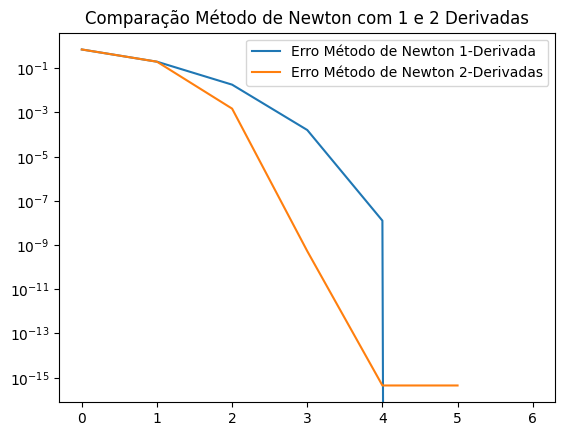

In [11]:
def f(x):
    return np.exp(x) - 10

def df(x):
    return np.exp(x)

def ddf(x):
    return np.exp(x)

ans = 2.302585092994046 # Esse é o ln(10)

error_newton = np.abs(np.array(newton(f, df, 3)) - ans)
error_newton2 = np.abs(np.array(newton2(f, df, ddf, 3)) - ans)

plt.semilogy(range(len(error_newton)), error_newton, label="Erro Método de Newton 1-Derivada")
plt.semilogy(range(len(error_newton2)), error_newton2, label="Erro Método de Newton 2-Derivadas")
plt.title("Comparação Método de Newton com 1 e 2 Derivadas")
plt.legend()

ax = plt.gca()

In [12]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Este resultado é esperado? Comente

Esse resultado é esperado.

Pode-se ver que o Método de Newton com duas derivadas é mais rápido na sua convergência e, apesar de o Método de Newton com uma derivada ter chegado no valor exato, isso se trata mais de detalhes de implementação do que em eficiência do Método.

Isso ocorre porque com a aproximação com duas derivadas, o erro de ajuste da função é menor do que com a aproximação com apenas uma derivada. Buscando valores de $x$ dentro da vizinhança do $x_0$, garantimos o bom comportamento da função e aproximações com erros cada vez menores.

Ambos os métodos fizeram uma iteração que "não saiu do lugar".
Explique porque eles não pararam na iteração anterior.

Isso ocorre porque os métodos têm como regra de parada a diferença entre o valor obtido na iteração e na iteração anterior. Se esse erro for baixo o suficiente, o método para. Entretanto, nenhum dos métodos sabe de antemão qual é o resultado, apenas sabe que se a diferença entre duas iterações é muito baixa, então é hora de parar. E, para isso, ela precisa de um valor base de comparação que é dado pela própria iteração anterior.

## Questão 4: Uma outra função

Use ambos os métodos para encontrar uma raiz de $xe^x = 10$.

Dê, abaixo, as funções auxiliares:

In [13]:
def g(x):
    return x * np.exp(x) - 10

def dg(x):
    return np.exp(x) + x * np.exp(x)

def ddg(x):
    return 2 * np.exp(x) + x * np.exp(x)


Agora, calcule os pontos gerados por ambos os métodos, começando a partir de $x_0 = 1$:

In [15]:
xx_newton = np.array(newton(g, dg, 1))
xx_newton2 = np.array(newton2(g, dg, ddg, 1))

yy_newton = g(xx_newton)
yy_newton2 = g(xx_newton2)

Faça o gráfico do erro "em $y$", ou seja, o quanto a equação está errada (já que não temos a solução analítica).

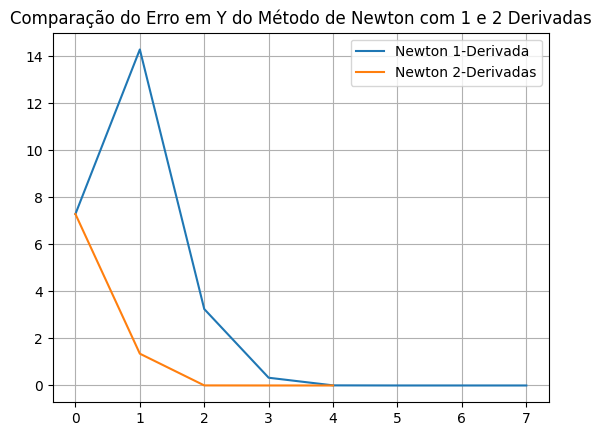

In [16]:
# O valor do erro em Y é o valor da própria função nos pontos retornados por Newton, em absoluto

plt.plot(range(len(yy_newton)), np.abs(yy_newton), label="Newton 1-Derivada")
plt.plot(range(len(yy_newton2)), np.abs(yy_newton2), label="Newton 2-Derivadas")
plt.title("Comparação do Erro em Y do Método de Newton com 1 e 2 Derivadas")
plt.grid()
plt.legend()
ax = plt.gca()

In [17]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Comente, novamente, os resultados, indicando eventuais semelhanças e diferenças com o caso anterior.

Nesse caso fica bem claro que o Método com Duas Derivadas se aproxima bem mais rápido do que o Método com uma única derivada (ou seja, o Método de Newton original). Novamente o motivo é o mesmo do que no caso anterior - como a função é bem comportada (duas vezes derivável), a Série de Taylor de maior grau possui um erro menor, em uma vizinhança dos pontos de aproximação, permitindo uma descida ao zero mais eficiente no Método de Newton com duas derivadas.

# Parte 2: Calculando integrais

Dê, abaixo, os métodos do retângulo, trapézio e ponto médio.

In [18]:
def rectangle(f, a, b, n=100):
    h = (b - a) / n
    particao = np.arange(a, b, h)
    return np.sum(f(particao) * h)

def trap(f, a, b, n=100):
    h = (b - a) / n
    particao_inicio = np.arange(a, b, h)
    particao_fim = particao_inicio + h
    return np.sum(((f(particao_inicio) + f(particao_fim))/2)*h)

def midpoint(f, a, b, n=100):
    h = (b - a) / n
    particao_inicio = np.arange(a, b, h)
    particao_fim = particao_inicio + h
    return np.sum(f((particao_inicio + particao_fim)/2)*h)

methods = [rectangle, trap, midpoint]

In [19]:
assert not np.isclose(rectangle(np.sin, 0, 1), 1 - np.cos(1))

In [20]:
assert np.isclose(trap(np.sin, 0, 1), 1 - np.cos(1))

In [21]:
assert np.isclose(midpoint(np.sin, 0, 1), 1 - np.cos(1))

## Questão 5: Integrando o cosseno

Faça o gráfico do erro de integração da função cosseno, no intervalo $[0, 2\pi]$,
para $n$ indo de $1$ até $30$,
para cada um dos métodos.

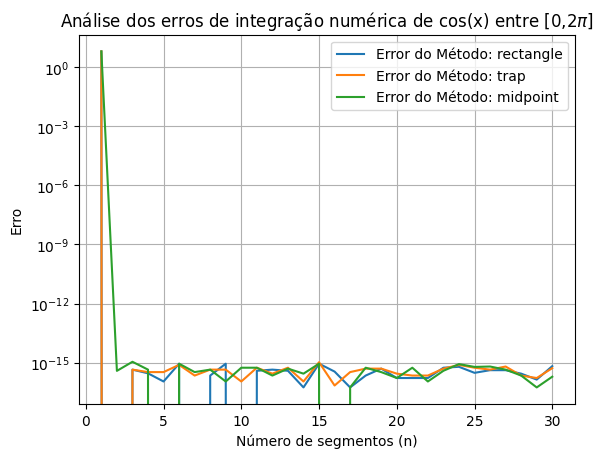

In [36]:
ns = range(1,30+1)

# Obs.: A integral do cosseno de [0, 2pi] é igual a ZERO.
f = np.cos
ans = 0
for m in methods:
    integrais = np.array([m(f, 0, 2 * np.pi, n) for n in ns])
    plt.semilogy(ns, np.abs(integrais-ans), label="Error do Método: {}".format(m.__name__))
plt.title("Análise dos erros de integração numérica de cos(x) entre [0,2$\\pi$]")
plt.xlabel("Número de segmentos (n)")
plt.ylabel("Erro")
plt.grid()
plt.legend()
ax = plt.gca()

In [37]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

O que você percebe neste gráfico?  Como você explica?

Em todos os métodos a converência é muito rápida, caindo todos os erros para truncamento numérico muito rápido. Isso ocorre porque a integral dada no intervalo é simétrica em valores positivos e negativos e simétrica em relação aos segmentos calculados, sempre o erro positivo compensando o erro negativo entre os intervalos.

Repita para o intervalo $[0, \pi]$.
Agora, faça cada método em uma figura separada:

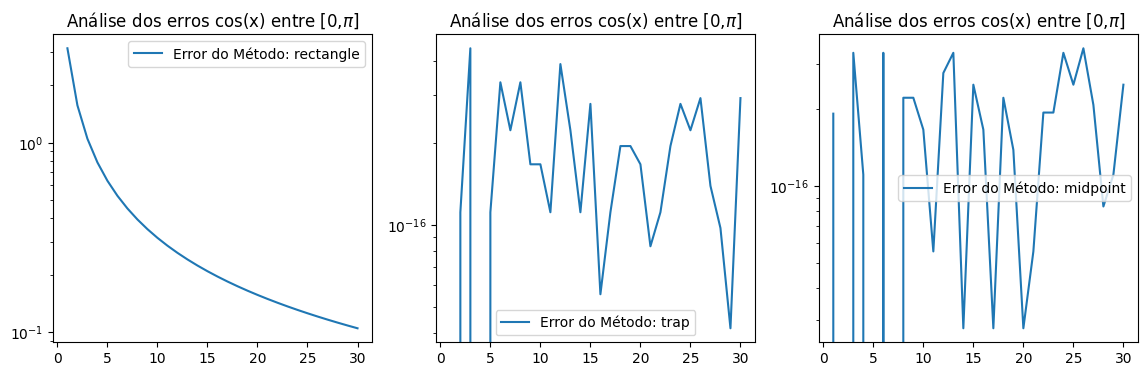

In [47]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4))

ns = range(1,30+1)

# Obs.: A integral do cosseno de [0, 2pi] é igual a ZERO.
f = np.cos
ans = 0
for m,ax in zip(methods, axs):
    integrais = np.array([m(f, 0, np.pi, n) for n in ns])
    ax.semilogy(ns, np.abs(integrais-ans), label="Error do Método: {}".format(m.__name__))
    ax.set_title("Análise dos erros cos(x) entre [0,$\\pi$]")
    ax.legend()
ax = plt.gca()

In [46]:
for ax in axs:
    assert len(ax.lines) == 1
    assert len(ax.get_title()) >= 1

Comente as semelhanças e diferenças do caso anterior.

O erro no método do Trapéxio e do MidPoint convergiram muito rapido, dada a simetria desses métodos, enquanto o método do retangulo, que não se utiliza da redução dos erros pelas simetrias dos intervalos, ficando o erro bruto do retângulo em cada segmento.

Qual a velocidade de convergência de cada um dos métodos para a integral no intervalo $[0, \pi]$?

YOUR ANSWER HERE

## Questão 6: Uma outra função

Calcule a integral de $\frac{1}{2 + \cos(x)}$ no intervalo $[0, 2\pi]$, com cada um dos métodos,
e faça novamente o gráfico do erro em função do número de subdivisões.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

* Qual a velocidade de convergência de cada um dos métodos?
* Qual método parece ser mais rápido?

YOUR ANSWER HERE

Agora, repita para o intervalo $[0, \pi/2]$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()

Compare com os resultados para a integral no intervalo $[0, 2\pi]$.

YOUR ANSWER HERE

## Questão 7: E mais uma

$$\int_0^{2\pi} \frac{dx}{1 + 2\cos^2(x)}$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

Compare com o que você obteve para a função $\frac{1}{1 + 2 \cos(x)}$:
- O que você percebe de semelhante?
- O que há de diferente?
- Como você explica as diferenças e similaridades?

YOUR ANSWER HERE

## Questão 8: A última

Calcule

$$\int_0^{2\pi} \frac{\sin(1999x)}{\sin(x)}$$

pelo método do ponto médio, variando o número de subdivisões entre $2$ e $2000$ como abaixo,
e faça o gráfico do **valor da integral** ao variar $n$.

In [ ]:
ns = range(2,2000,2)

# YOUR CODE HERE
raise NotImplementedError()

O que você vê no gráfico?

YOUR ANSWER HERE

Explique porque usar o método do ponto médio, e porque usar um número par de subdivisões.

YOUR ANSWER HERE

### Bônus

Como você faria para ter certeza do valor correto da integral?
Explique suas ideias abaixo, e faça contas, se desejar, na caixa seguinte.

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()